In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def LoadTrack (directory) :
    File = open(directory,'r')
    lines = File.readlines()
    
    length = int(lines[0])
    
    gantry_angle = []
    table_angle = []
    for l in lines[1:] :
        word = l.split('\t')
        #print(word)
        gantry_angle.append(float(word[0]))
        table_angle.append(float(word[1]))
    
    return np.array(gantry_angle), np.array(table_angle)

In [3]:
track_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/plans/p1/gtc/'+'t1-gtc.txt'

ga, ta = LoadTrack(directory=track_path)

In [4]:
"""def GetIsocenter (directory) :
    File = open(directory,'r')
    lines = File.readlines()
    
    tup = lines[0].split(' ')
    lis = [float(t) for t in tup]
    return np.array(lis)"""

"def GetIsocenter (directory) :\n    File = open(directory,'r')\n    lines = File.readlines()\n    \n    tup = lines[0].split(' ')\n    lis = [float(t) for t in tup]\n    return np.array(lis)"

In [5]:
#isocenter_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/setups/all_OaR/isocenter.txt'
#iso = GetIsocenter(directory=isocenter_path)
iso = np.array([0.,0.,0.])
print('isocenter hfs: ',iso)


isocenter hfs:  [ 0.  0.  0.]


In [6]:
"""def GetRadialVector (gantry_angle, table_angle) :
    
    phi = gantry_angle + 180. # [0,360]
    theta = table_angle + 90. # [0,180]
    
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    return np.array([x,y,z])"""

'def GetRadialVector (gantry_angle, table_angle) :\n    \n    phi = gantry_angle + 180. # [0,360]\n    theta = table_angle + 90. # [0,180]\n    \n    x = np.sin(theta) * np.cos(phi)\n    y = np.sin(theta) * np.sin(phi)\n    z = np.cos(theta)\n    \n    return np.array([x,y,z])'

In [7]:
#r = GetRadialVector(gantry_angle=ga[0],table_angle=ta[0])
SAD = 100.
#BEV = iso + SAD * r
BEV = np.array([0.,0.,SAD])
#print(r)
print('beam eye view',BEV)

beam eye view [   0.    0.  100.]


In [8]:
def GetPTV_vertices (directory) :
    File = open(directory,'r')
    lines = File.readlines()
    
    N_vertices = int(lines[0])
    vertices = []
    for l in lines[1:N_vertices] :
        word = l.split(' ')
        v = np.array([float(word[0]),float(word[1]),float(word[2])])
        vertices.append(v)
    return np.array(vertices)

In [9]:
PTV_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/setups/all_OaR/PTV_I.1.1_hfs.txt'
#PTV_path = '/home/janik/Praktikum_medPhys/dto/patients/Camus/mesh/PTV_I.1.1.txt'

PTV_vertices = GetPTV_vertices(directory=PTV_path)
print(PTV_vertices[0])
print(np.shape(PTV_vertices))


[-0.782627 -4.24086   2.46885 ]
(2360, 3)


In [22]:
def PlotCload(point_matrix) :
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111,projection='3d')

    x = point_matrix[:,0]
    y = point_matrix[:,1]
    z = point_matrix[:,2]
    
    ax.scatter(x,y,z,'bo')
    ax.scatter(0.,0.,0.,'bo')

    plt.show()

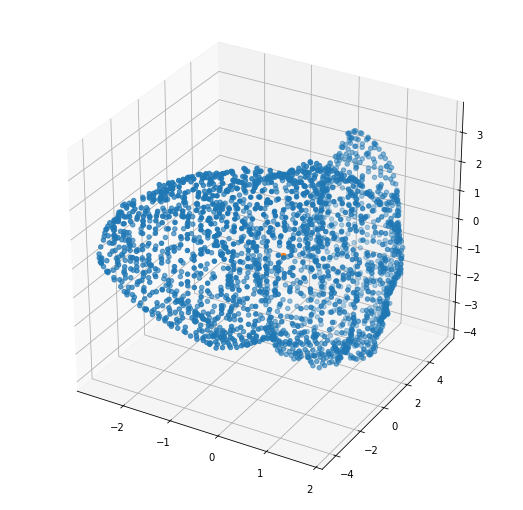

In [23]:
PlotCload(point_matrix=PTV_vertices)

In [24]:
gantry = np.deg2rad( 135.)#ga[0]
table = np.deg2rad(45.)#ta[0]

print(gantry,table)

2.35619449019 0.785398163397


In [25]:
Rz = np.array([[np.cos(-table), -np.sin(-table), 0.],
               [np.sin(-table),np.cos(-table),0.],
               [0.,0.,1.]])

Ry = np.array([[np.cos(-gantry), 0 , -np.sin(-gantry)],
             [0.,1.,0.],
             [np.sin(-gantry),0.,np.cos(-gantry)]])


In [26]:
def dot(a,b) :
    return np.linalg.multi_dot((a,b))

In [27]:
PTV_vertices_trafo = np.array([dot(dot(Rz,v),Ry) for v in PTV_vertices])

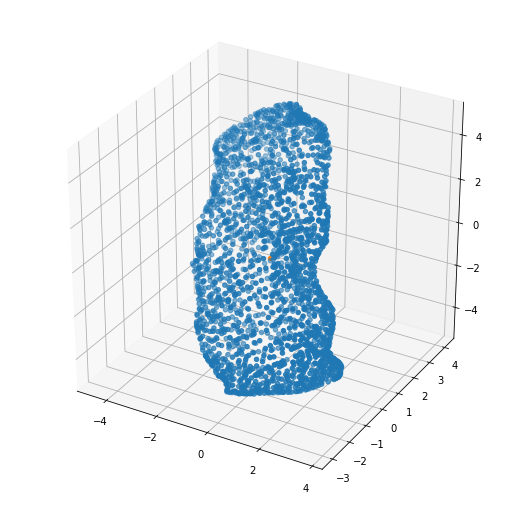

In [28]:
PlotCload(point_matrix=PTV_vertices_trafo)

$$
v_{proj} = v - ((v-iso=0) \cdot r=e_z) \cdot r=e_z )
$$

In [29]:
def projection (vector, BEV) :
    z_BEV = BEV[2]
    z_p = vector[2]
    
    lam = z_p / (z_BEV - z_p)
    
    
    return vector + lam * (vector - BEV)

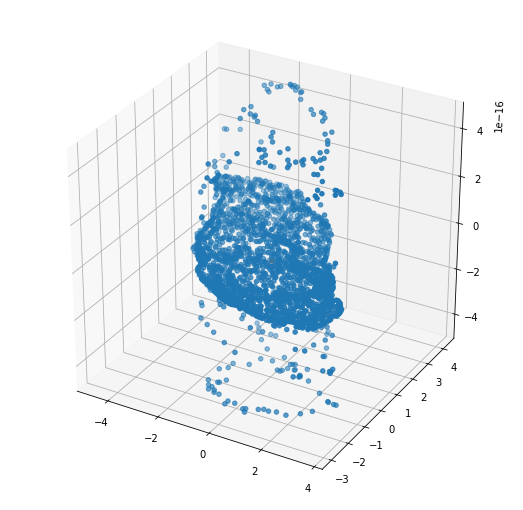

In [31]:
PTV_vertices_trafo_proj = np.array([projection(vector=v,BEV=BEV) for v in PTV_vertices_trafo])
PlotCload(point_matrix=PTV_vertices_trafo_proj)

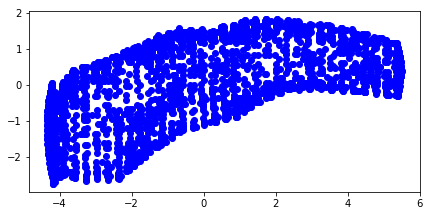

In [141]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(111)
a = [i[0] for i in PTV_vertices_trafo_proj]
b = [i[1] for i in PTV_vertices_trafo_proj]

ax.set_aspect(aspect='equal')
plt.plot(a,b,'bo')
plt.show()

In [147]:
from scipy.spatial import ConvexHull
points = (PTV_vertices_trafo_proj[:,[0,1]])   # 30 random points in 2-D
hull = ConvexHull(points,incremental=True)

In [148]:
print(hull.simplices)

[[2272  655]
 [ 223  433]
 [ 219  655]
 [ 219  221]
 [1591 1646]
 [1591 1133]
 [ 973  433]
 [ 973 1133]
 [2259 2268]
 [2291 2286]
 [1985 1905]
 [2269 2268]
 [2269 2262]
 [2261 2272]
 [2261 2262]
 [ 137  126]
 [  95  126]
 [2263 2270]
 [2263 2259]
 [2290 2270]
 [2290 2291]
 [1700 1646]
 [1700 1756]
 [1810 1756]
 [2099 2286]
 [2099 1985]
 [ 109  122]
 [ 109   79]
 [  88   79]
 [  83   84]
 [  85   86]
 [  85   84]
 [ 125  122]
 [ 125  137]
 [  99   95]
 [1904 1905]
 [1904 1810]
 [  78   86]
 [  78   88]
 [  82  221]
 [  82   83]
 [ 228  223]
 [ 228   99]]


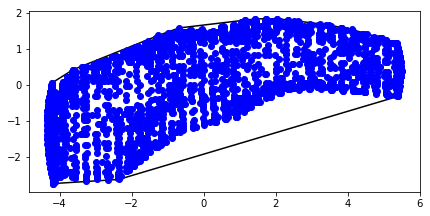

In [149]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(111)
a = [i[0] for i in PTV_vertices_trafo_proj]
b = [i[1] for i in PTV_vertices_trafo_proj]
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
ax.set_aspect(aspect='equal')
plt.plot(a,b,'bo')
plt.show()

In [53]:
x_BEV = PTV_vertices_trafo_proj[:,0]
y_BEV = PTV_vertices_trafo_proj[:,1]

colli_angle = np.deg2rad(np.arange(-175.,176,2.)) # [-179,179] in steps of 2
#length = len(colli_angle)

colli_matrix = np.array([np.cos(colli_angle),np.sin(colli_angle)])

print(np.shape(colli_matrix))
print(np.shape(PTV_vertices_trafo_proj[:,:-1]))

(2, 176)
(2360, 2)


In [54]:
A = np.dot(PTV_vertices_trafo_proj[:,:-1],colli_matrix)

x_min_dist = np.max(A,axis=0) - np.min(A,axis=0)

# LOOP


In [78]:
import time

In [80]:
length = len(ga)

col_map = []
start = time.time()

for i in range(length) :
    gantry = np.deg2rad( ga[i])#ga[0]
    table = np.deg2rad(ta[i])#ta[0]
    
    Rz = np.array([[np.cos(-table), -np.sin(-table), 0.],
               [np.sin(-table),np.cos(-table),0.],
               [0.,0.,1.]])

    Ry = np.array([[np.cos(-gantry), 0 , -np.sin(-gantry)],
             [0.,1.,0.],
             [np.sin(-gantry),0.,np.cos(-gantry)]])

    PTV_vertices_trafo = np.array([dot(dot(Rz,v),Ry) for v in PTV_vertices])
    PTV_vertices_trafo_proj = np.array([projection(vector=v,BEV=BEV) for v in PTV_vertices_trafo])

    
    
    colli_angle = np.deg2rad(np.arange(-175.,176,2.)) # [-179,179] in steps of 2
    colli_matrix = np.array([np.cos(colli_angle),np.sin(colli_angle)])
    
    A = np.dot(PTV_vertices_trafo_proj[:,:-1],colli_matrix)
    x_min_dist = np.max(A,axis=0) - np.min(A,axis=0)
    
    col_map.append(x_min_dist)

print('time: ',time.time()-start)    

time:  12.959928035736084


In [160]:
BEV = np.zeros(len(PTV_vertices[:,0])) + SAD
print(type(BEV))
print (BEV)

<class 'numpy.ndarray'>
[ 100.  100.  100. ...,  100.  100.  100.]


In [240]:
length = len(ga)

col_map = []
start = time.time()

print(PTV_vertices[0])
print(PTV_vertices[0,[0,1]])
print(PTV_vertices[0,[0,2]])


colli_angle = np.deg2rad(np.arange(-179.,0.,2.)) # [-179,179] in steps of 2
print(len(colli_angle))

colli_matrix = np.array([np.cos(colli_angle),np.sin(colli_angle)])



BEV = np.zeros(np.shape(PTV_vertices)) 
BEV[:,2] += SAD
    
for i in range(length) :
    gantry = np.deg2rad( ga[i])#ga[0]
    table = np.deg2rad(ta[i])#ta[0]
    
    Rz_red = np.array([[np.cos(-table), -np.sin(-table)],
               [np.sin(-table),np.cos(-table)]])

    Ry_red = np.array([[np.cos(-gantry), -np.sin(-gantry)],
                         [np.sin(-gantry),np.cos(-gantry)]])

    M1 = np.dot(Rz_red,PTV_vertices[:,[0,1]].T) 
    #print(np.shape(PTV_vertices[:,[0,1]].T))
    
    
    y_trafo = M1[1,:]
    
    #print(np.shape(M1[0,:]))
    #print(np.shape(PTV_vertices[:,2]))
    
    #print(np.shape(np.vstack((M1[0,:],PTV_vertices[:,2])).T))
    
    #print(np.shape(np.vstack((M1[0,:],PTV_vertices[:,2])) ))
    
    M2 = np.dot(Ry_red,np.vstack((M1[0,:],PTV_vertices[:,2])) )
    x_trafo = M2[0,:]
    z_trafo = M2[1,:]
    
    PTV_vertices_trafo = np.vstack((x_trafo,y_trafo,z_trafo)).T
    
    #print(np.shape(PTV_vertices_trafo))
    #PTV_vertices_trafo = np.array([dot(dot(Rz,v),Ry) for v in PTV_vertices])
    
    """
    def projection (vector, BEV) :
    z_BEV = BEV[2]
    z_p = vector[2]
    
    lam = z_p / (z_BEV - z_p)
    
    
        return vector + lam * (vector - BEV)
    """
    #PTV_vertices_trafo_proj = np.array([projection(vector=v,BEV=BEV) for v in PTV_vertices_trafo])
    z_points = PTV_vertices_trafo[:,2]
    #print(np.shape(z_points))
    #print(BEV)
    lambda_vec = np.divide(z_points,BEV[:,2]-z_points)
    PTV_vertices_trafo_proj = PTV_vertices_trafo + np.multiply((PTV_vertices_trafo-BEV).T,lambda_vec).T
    #PTV_vertices_trafo_proj = PTV_vertices_trafo
    
    
    A = np.dot(PTV_vertices_trafo_proj[:,[0,1]],colli_matrix)
    #print(type(A))
    #print(np.shape(A))
    #x_min_dist = A.max(axis=0) - A.min(axis=0)
    #x_min_dist = A.max(axis=0)
    x_min_dist = np.max(A,axis=0) - A.min(axis=0)
    
    col_map.append(x_min_dist)
    
print('time: ',time.time()-start)    

[-0.782627 -4.24086   2.46885 ]
[-0.782627 -4.24086 ]
[-0.782627  2.46885 ]
90
time:  0.8325116634368896


In [246]:
dist_map = np.hstack((col_map,col_map)).T
print(dist_map.shape)

(180, 178)


In [251]:
def QuickPlot2 (pic) :
    plt.figure(figsize=(11,11))
    plt.imshow(pic,origin='left',cmap='jet',extent=[-180,180,-180,180])
    ##plt.gca().set_xticks(np.arange(-180,180,2))
    #plt.gca().set_yticks(np.arange(-175,175,2))
    plt.xlabel('gantry angle')
    plt.ylabel('collimator angle angle')
    plt.colorbar(orientation='horizontal')

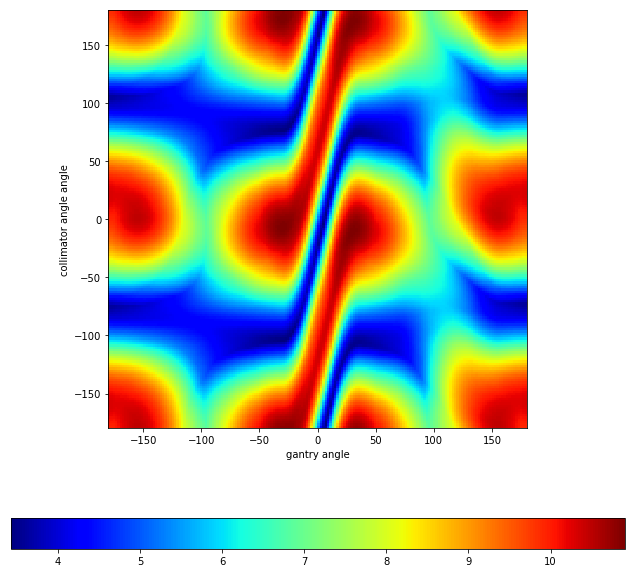

In [252]:
QuickPlot2(pic=dist_map)
plt.show()

$$
v_{proj} = v - ((v-iso) \cdot r) \cdot r )
$$

In [70]:
print(PTV_vertices[0:5])
print(iso)
print(r)
print('------------')
print((PTV_vertices-iso)[0:5])
print((np.dot(PTV_vertices-iso,r))[0:5])
minus = ([factor*r for factor in np.dot(PTV_vertices-iso,r)])
print(([factor*r for factor in np.dot(PTV_vertices-iso,r)])[0:5])
print('---------')
print(list(np.array(PTV_vertices)-np.array(minus))[0:5])

PTV_vertices_projected = list(np.array(PTV_vertices)-np.array(minus))

[array([-0.782627, -4.24086 ,  2.46885 ]), array([-0.782627, -4.271   ,  2.33681 ]), array([-0.518565, -4.27432 ,  2.33681 ]), array([-1.04669, -4.271  ,  2.20478]), array([-0.782627, -4.29115 ,  2.20478 ])]
[  6.62501   9.49326 -14.2247 ]
[ 0.03821135  0.05951065 -0.99749605]
------------
[[ -7.407637 -13.73412   16.69355 ]
 [ -7.407637 -13.76426   16.56151 ]
 [ -7.143575 -13.76758   16.56151 ]
 [ -7.6717   -13.76426   16.42948 ]
 [ -7.407637 -13.78441   16.42948 ]]
[-17.75213247 -17.62221674 -17.61232415 -17.50060754 -17.49171648]
[array([ -0.67833295,  -1.05644097,  17.70768207]), array([ -0.67336869,  -1.0487096 ,  17.57809164]), array([ -0.67299068,  -1.04812089,  17.56822382]), array([ -0.66872184,  -1.04147256,  17.45678694]), array([ -0.6683821 ,  -1.04094345,  17.44791814])]
---------
[array([ -0.10429405,  -3.18441903, -15.23883207]), array([ -0.10925831,  -3.2222904 , -15.24128164]), array([  0.15442568,  -3.22619911, -15.23141382]), array([ -0.37796816,  -3.22952744, -15.25

<IPython.core.display.Javascript object>


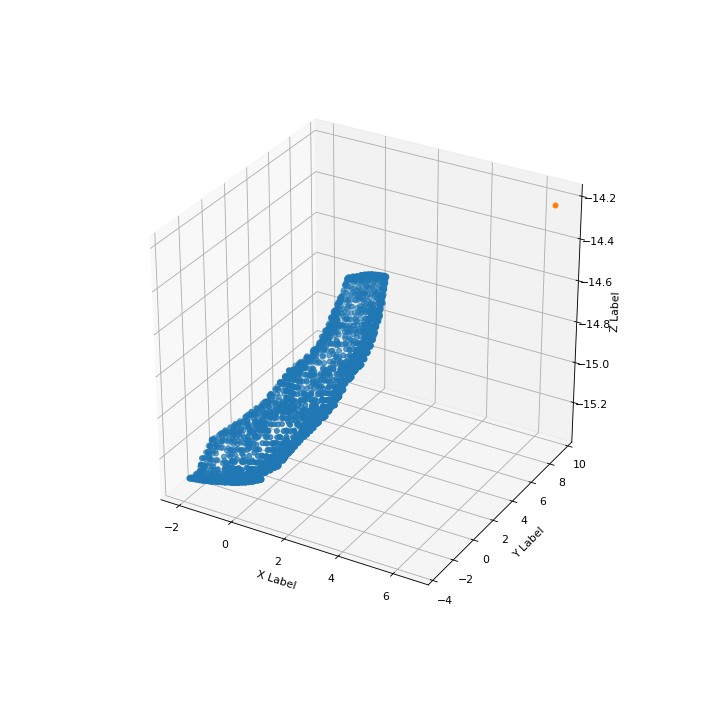

In [79]:
%matplotlib notebook
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')

a = [i[0] for i in PTV_vertices_projected]
b = [i[1] for i in PTV_vertices_projected]
c = [i[2] for i in PTV_vertices_projected]


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(a,b,c,'bo')
ax.scatter(iso[0],iso[1],iso[2],'ro')
plt.show()